In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import defaultdict
import os

In [5]:
# Main Data Imports
snapshot = pd.read_parquet('Data/snapshot_player_stats.parquet')
player_stats = pd.read_parquet('Data/player_game_stats.parquet')

In [6]:
snapshot.head(1)

,game_urn,player_urn,seq_idx,event_date_time,game_time,winning_team,player,team_urn,team,champion,...,vision_score,total_damage_dealt_champions,total_damage_taken,item_1_id,item_2_id,item_3_id,item_4_id,item_5_id,item_6_id,item_7_id
0,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:051c9431-16d0-3872-98c4-c...,16,2023-06-14 21:13:15.338000+00:00,138,None,Fudge,live:lol:riot:team:98767991877340524,C9,KSante,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
snapshot.columns

Index(['game_urn', 'player_urn', 'seq_idx', 'event_date_time', 'game_time',
       'winning_team', 'player', 'team_urn', 'team', 'champion', 'level',
       'alive', 'health', 'current_gold', 'total_gold', 'gold_per_second',
       'pos_x', 'pos_y', 'minions_killed', 'neutral_minions_killed',
       'neutral_minions_killed_your_jungle',
       'neutral_minions_killed_enemy_jungle', 'champs_killed', 'deaths',
       'assists', 'wards_placed', 'wards_killed', 'vision_score',
       'total_damage_dealt_champions', 'total_damage_taken', 'item_1_id',
       'item_2_id', 'item_3_id', 'item_4_id', 'item_5_id', 'item_6_id',
       'item_7_id'],
      dtype='object')

In [8]:
# filter for jungle data
blabber_snapshots = snapshot[(snapshot['player'] == 'Blaber') & (snapshot['seq_idx'] <= 360)]

In [48]:
# Placeholder for first gank times
first_gank_times = []
first_gank_positions = []

for game in blabber_snapshots['game_urn'].unique():
    game_data = blabber_snapshots[blabber_snapshots['game_urn'] == game]
    overall_game_data = snapshot[(snapshot['game_urn'] == game) & (snapshot['seq_idx'] <= 360)]
    start_time = blabber_snapshots['game_time'].sort_values().iloc[-1]
    gank_threshold_distance = 1000
    
    for index, row in game_data.iterrows():
        
        if row['seq_idx'] < 100:
            continue

        # Check if an enemy champion died near the jungler
        successful_gank = overall_game_data[(overall_game_data['seq_idx'] == row['seq_idx']) & 
                                (overall_game_data['team'] != row['team']) &
                                (abs(overall_game_data['pos_x'] - row['pos_x']) < gank_threshold_distance) & 
                                (abs(overall_game_data['pos_y'] - row['pos_y']) < gank_threshold_distance)]
        
        if successful_gank.shape[0] > 0:
            first_gank_times.append((row['game_time'] - start_time) // 60)  # Storing in minutes
            first_gank_positions.append((row['pos_x'], row['pos_y']))
            print('success')
            break

# Constructing the time series
gank_time_series = pd.Series(first_gank_times).value_counts().sort_index()

success
success
success
success
success
success
success
success
success
success
success


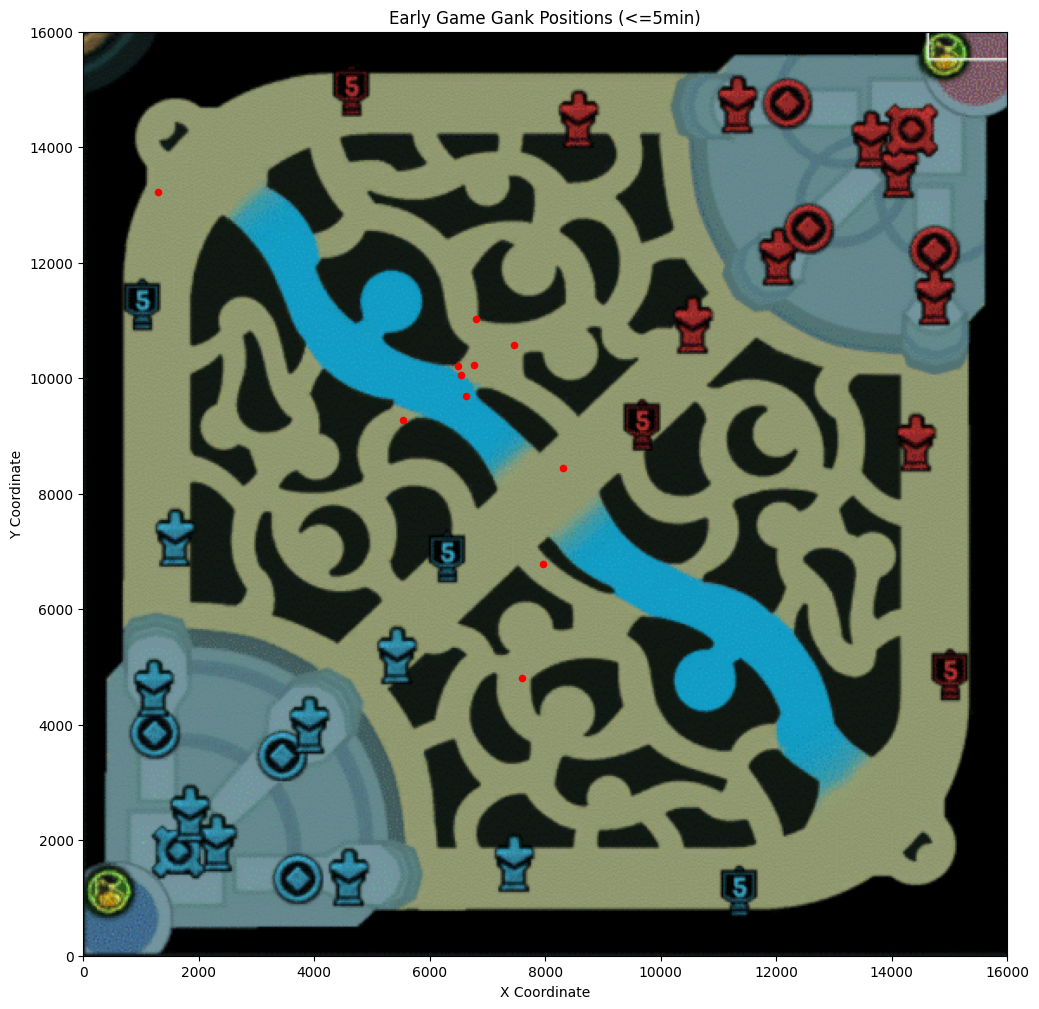

In [49]:
from ipywidgets import interactive, widgets

# Load the image
lol_map = plt.imread("minimap.png")
extent = [0, 16_000, 0, 16_000]

plt.figure(figsize=(12, 12))

# Display the map image
plt.imshow(lol_map, extent=extent)

# Generate scatter plot
# scale the positions to fix positioning
x_scale_factor = 1.075
y_scale_factor = 1.085
first_gank_positions = np.array(first_gank_positions)
plt.scatter(first_gank_positions[:, 0]*x_scale_factor, first_gank_positions[:, 1]*y_scale_factor, color='red', alpha=1, s=20)

plt.title(f"Early Game Gank Positions (<=5min)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [37]:
first_gank_positions

[(7069, 4438),
 (6287, 9429),
 (6031, 9381),
 (7416, 6233),
 (6025, 9437),
 (6162, 8929),
 (6034, 9359),
 (1211, 12192),
 (7721, 7785),
 (6084, 9275),
 (5992, 9364),
 (6037, 9405),
 (5160, 8842),
 (6334, 10136),
 (6133, 9423)]

In [10]:
c9_team_urn = player_stats[player_stats['team'] == 'C9']['game_urn'].unique()

In [11]:
player_stats.columns

Index(['game_urn', 'player_urn', 'team_urn', 'region', 'game_start_datetime',
       'best_of', 'curr_game', 'player', 'team', 'champion', 'side', 'role',
       'opp_player_urn', 'opp_player', 'opp_team_urn', 'opp_team',
       'opp_champion', 'result', 'kills', 'deaths', 'assists', 'double_kills',
       'triple_kills', 'quad_kills', 'penta_kills', 'first_blood',
       'avg_mins_between_kills', 'avg_mins_between_deaths', 'solo_kills',
       'iso_deaths', 'minion_kills', 'neutral_minion_kills',
       'neutral_minion_kills_team_jungle', 'neutral_minion_kills_enemy_jungle',
       'perc_in_mid_lane', 'num_recalls', 'total_damage_teamfights',
       'avg_damage_per_teamfight', 'dmg_to_champs_per_min',
       'dmg_shielded_on_team_per_min', 'dmg_healed_on_team_per_min',
       'total_gold', 'gold_at_15m', 'gold_diff_at_15m', 'wards_placed',
       'wards_killed', 'vision_score', 'jungle_prox', 'duo_prox', 'team_perid',
       'player_perid', 'opp_player_perid', 'opp_team_urn_perid', 'u

In [17]:
c9_team_urn = player_stats[player_stats['opp_team'] == 'C9']['game_urn'].unique()

In [24]:
blue_side_games = player_stats[player_stats['team_urn'] == c9_team_urn]['game_urn']
red_side_games = player_stats[player_stats['opp_team_urn'] == c9_team_urn]['game_urn']

ValueError: ('Lengths must match to compare', (570,), (29,))

In [19]:
red_side_games

NameError: name 'red_side_games' is not defined

In [20]:
blabber_snapshots['game_urn'].isin(red_side_games['game_urn'])

NameError: name 'red_side_games' is not defined

In [21]:
blabber_snapshots.columns

Index(['game_urn', 'player_urn', 'seq_idx', 'event_date_time', 'game_time',
       'winning_team', 'player', 'team_urn', 'team', 'champion', 'level',
       'alive', 'health', 'current_gold', 'total_gold', 'gold_per_second',
       'pos_x', 'pos_y', 'minions_killed', 'neutral_minions_killed',
       'neutral_minions_killed_your_jungle',
       'neutral_minions_killed_enemy_jungle', 'champs_killed', 'deaths',
       'assists', 'wards_placed', 'wards_killed', 'vision_score',
       'total_damage_dealt_champions', 'total_damage_taken', 'item_1_id',
       'item_2_id', 'item_3_id', 'item_4_id', 'item_5_id', 'item_6_id',
       'item_7_id', 'side'],
      dtype='object')

In [22]:
blabber_snapshots['side'] = 'blue'
blabber_snapshots.loc[blabber_snapshots['game_urn'].isin(red_side_games['game_urn']), 'side'] = 'red'

C:\Users\Ethan\AppData\Local\Temp\ipykernel_21092\2093071840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blabber_snapshots['side'] = 'blue'


NameError: name 'red_side_games' is not defined

In [23]:
from ipywidgets import interactive, widgets

# Load the image
lol_map = plt.imread("minimap.png")

def generate_jungle_path_plot(champion, side, seq_idx, data):
    # Set the dimensions of the LoL map for proper overlay
    extent = [0, 16_000, 0, 16_000]  # values based on your provided dimensions
    
    # Filter data based on champion
    champ_data = data[data['champion'] == champion]
    
    # Filter data up to the given timestamp
    champ_data = champ_data[champ_data['seq_idx'] <= seq_idx]  # assuming timestamp is in minutes
    
    # Filter based on the selected side
    if side != 'both':
        champ_data = champ_data[champ_data['side'] == side]
    
    plt.figure(figsize=(12, 12))
    
    # Display the map image
    plt.imshow(lol_map, extent=extent)
    
    # Plot paths
    for side in champ_data['side'].unique():
        side_data = champ_data[champ_data['side'] == side]
        plt.plot(side_data['pos_x'], side_data['pos_y'], label=f"{champion} - {side}", color='red')
    
    plt.legend()
    plt.title(f"Jungle Path for {champion}")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

def interactive_jungle_path(champion, side, timestamp):
    return generate_jungle_path_plot(champion, side, timestamp, blabber_snapshots)

# Unique champions in the dataset
champions = blabber_snapshots['champion'].unique()

# Set up the interactive element:
widget = interactive(interactive_jungle_path, 
                     champion=widgets.Dropdown(options=champions, description='Champion:'),
                     side=widgets.Dropdown(options=['blue', 'red', 'both'], value='both', description='Side:'),
                     timestamp=widgets.IntSlider(value=16, min=16, max=360, step=1, description='Seq Id:'))  # Adjust max time as needed

display(widget)


interactive(children=(Dropdown(description='Champion:', options=('Kindred', 'Khazix', 'Sejuani', 'Maokai', 'Re…